In [25]:
import numpy as np
import pandas as pd
from random import sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Section A

### Load dataset

In [26]:
weather_df = pd.read_csv("weatherAUS.csv")
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Data preprocessing

### Dropping unwanted attributes

In [27]:
weather_df.drop(['Evaporation', 'Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace=True)

In [28]:
weather_df.dropna(inplace=True)

In [29]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


### Extracting month from date column

In [30]:
weather_df['Date'] = weather_df['Date'].astype('datetime64[ns]')

In [31]:
weather_df['Date'] = weather_df['Date'].dt.month

In [32]:
weather_df.rename(columns={"Date": "Month"},inplace=True)

# Section B

### One-hot encoding of categorical attributes

In [33]:
loc_enc = pd.get_dummies(weather_df.Location, prefix='Location')
loc_enc.head()
weather_df = pd.concat([weather_df,loc_enc],axis=1)
weather_df.drop(['Location','Location_Wollongong'], axis=1, inplace=True)

In [34]:
wgd_enc = pd.get_dummies(weather_df.WindGustDir, prefix='WindGustDir')
wgd_enc.head()
weather_df = pd.concat([weather_df,wgd_enc],axis=1)
weather_df.drop(['WindGustDir','WindGustDir_WNW'], axis=1, inplace=True)

In [35]:
mon_enc = pd.get_dummies(weather_df.Month, prefix='Month')
mon_enc.head()
weather_df = pd.concat([weather_df,mon_enc],axis=1)
weather_df.drop(['Month','Month_12'], axis=1, inplace=True)

In [36]:
wd9_enc = pd.get_dummies(weather_df.WindDir9am, prefix='WindDir9am')
wd9_enc.head()
weather_df = pd.concat([weather_df,wd9_enc],axis=1)
weather_df.drop(['WindDir9am','WindDir9am_W'], axis=1, inplace=True)

In [37]:
wd3_enc = pd.get_dummies(weather_df.WindDir3pm, prefix='WindDir3pm')
wd3_enc.head()
weather_df = pd.concat([weather_df,wd3_enc],axis=1)
weather_df.drop(['WindDir3pm','WindDir3pm_W'], axis=1, inplace=True)

In [38]:
rt_enc = pd.get_dummies(weather_df.RainToday, prefix='RainToday')
rt_enc.head()
weather_df = pd.concat([weather_df,rt_enc],axis=1)
weather_df.drop(['RainToday','RainToday_No'], axis=1, inplace=True)
weather_df.rename(columns={"RainToday_Yes": "RainToday"},inplace=True)

In [39]:
target = weather_df['RainTomorrow']
weather_df.drop(['RainTomorrow'],axis=1,inplace=True)

In [40]:
weather_df = pd.concat([weather_df,target],axis=1)

In [41]:
weather_df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,0,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,0,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,1,0,0,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,0,0,0,0,0,0,0,No
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,0,No
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,0,No
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,1,0,0,No


In [42]:
weather_df["RainTomorrow"] = weather_df["RainTomorrow"].astype('category')
weather_df["RainTomorrow"] = weather_df["RainTomorrow"].cat.codes
weather_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_WNW,WindDir3pm_WSW,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,1,0,0,0,0,0,0,0,0,0


### Splitting train and test data

In [43]:
x, y = weather_df.drop(['RainTomorrow'], axis=1), weather_df['RainTomorrow']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.066419,random_state=123)

In [45]:
x_train.shape

(7500, 112)

In [46]:
#Normalize train data
n = Normalizer()
x_train_norm = n.fit_transform(x_train)
x_test_norm = n.fit_transform(x_test)

In [47]:
from sklearn.svm import SVC
svm = SVC()
parameters = {'kernel':['linear'], 'C':[0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train_norm, y_train)
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 100, 'kernel': 'linear'}


In [48]:
pd.DataFrame(grid_search.cv_results_)[['param_C','mean_test_score','rank_test_score']]

,param_C,mean_test_score,rank_test_score
0,0.01,0.786133,3
1,0.1,0.786133,3
2,1,0.786133,3
3,10,0.804667,2
4,100,0.847600,1


In [49]:
parameters = {'kernel':['rbf'], 'C':[0.01, 0.1, 1, 10, 100], 'gamma':[0.01, 0.1, 1, 10, 100]}
grid_search1 = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search1.fit(x_train_norm, y_train)
best_parameters1 = grid_search1.best_params_
print(best_parameters1)

{'C': 100, 'gamma': 100, 'kernel': 'rbf'}


In [50]:
pd.DataFrame(grid_search1.cv_results_)[['param_C','param_gamma','mean_test_score','rank_test_score']]

,param_C,param_gamma,mean_test_score,rank_test_score
0,0.01,0.01,0.786133,14
1,0.01,0.1,0.786133,14
2,0.01,1,0.786133,14
3,0.01,10,0.786133,14
4,0.01,100,0.786133,14
5,0.1,0.01,0.786133,14
6,0.1,0.1,0.786133,14
7,0.1,1,0.786133,14
8,0.1,10,0.786133,14
9,0.1,100,0.838533,7


In [51]:
svm_train = SVC(C = 100, gamma = 100, kernel= 'rbf')
svm_train.fit(x_train_norm, y_train)
svm_train.score(x_train_norm, y_train)*100

85.84

# Section C

In [4]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Data preprocessing

In [5]:
df.drop(['Evaporation', 'Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace=True)
df.dropna(inplace=True)

### Extracting month from date column

In [6]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [7]:
df['Date'] = df['Date'].dt.month
df.rename(columns={"Date": "Month"},inplace=True)

### Label Encoding

In [8]:
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [9]:
df["Location"] = df["Location"].astype('category')
df["WindGustDir"] = df["WindGustDir"].astype('category')
df["WindDir9am"] = df["WindDir9am"].astype('category')
df["WindDir3pm"] = df["WindDir3pm"].astype('category')
df["RainToday"] = df["RainToday"].astype('category')
df["RainTomorrow"] = df["RainTomorrow"].astype('category')

In [10]:
df.dtypes

Month               int64
Location         category
MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Temp9am           float64
Temp3pm           float64
RainToday        category
RainTomorrow     category
dtype: object

In [11]:
df["Location"] = df["Location"].cat.codes
df["WindGustDir"] = df["WindGustDir"].cat.codes
df["WindDir9am"] = df["WindDir9am"].cat.codes
df["WindDir3pm"] = df["WindDir3pm"].cat.codes
df["RainToday"] = df["RainToday"].cat.codes
df["RainTomorrow"] = df["RainTomorrow"].cat.codes

In [12]:
df.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,12,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,12,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,12,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


### Splitting train and test data

In [13]:
x1, y1 = df.drop(['RainTomorrow'], axis=1), df['RainTomorrow']

In [14]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,train_size=0.066419,random_state=123)

In [15]:
x1_train.shape

(7500, 18)

### Train Random forest classifier for optimal hyperparameter

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 1000, criterion='entropy', random_state = 1)
parameters_rfc = {'max_features' : [4,5,6,7,8]}
grid_search2 = GridSearchCV(estimator=rfc, param_grid=parameters_rfc, scoring='accuracy', cv=5, n_jobs=-1)
grid_search2.fit(x1_train, y1_train)
best_parameters2 = grid_search2.best_params_
print(best_parameters2)

{'max_features': 6}


In [17]:
pd.DataFrame(grid_search2.cv_results_)[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,{'max_features': 4},0.852800,2
1,{'max_features': 5},0.852267,3
2,{'max_features': 6},0.853600,1
3,{'max_features': 7},0.852267,3
4,{'max_features': 8},0.852133,5


### Training random forest classifier with optimal hyperparameters

In [18]:
rfc_train = RandomForestClassifier(n_estimators= 1000, criterion='entropy', max_features=6, random_state = 1)
rfc_train.fit(x1_train, y1_train)
rfc_train.score(x1_train, y1_train)*100

100.0

### Feature Importance plot by Random Forest Classifier

Feature: 0, Score: 0.02894
Feature: 1, Score: 0.04331
Feature: 2, Score: 0.05010
Feature: 3, Score: 0.04673
Feature: 4, Score: 0.06370
Feature: 5, Score: 0.03307
Feature: 6, Score: 0.06204
Feature: 7, Score: 0.03378
Feature: 8, Score: 0.03319
Feature: 9, Score: 0.03377
Feature: 10, Score: 0.03838
Feature: 11, Score: 0.06502
Feature: 12, Score: 0.20638
Feature: 13, Score: 0.06345
Feature: 14, Score: 0.07442
Feature: 15, Score: 0.04574
Feature: 16, Score: 0.05114
Feature: 17, Score: 0.02683


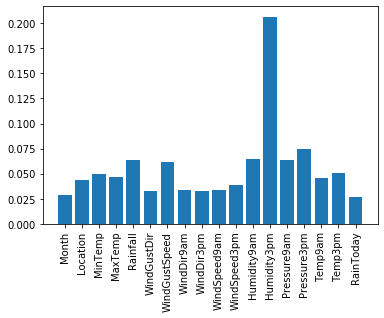

In [19]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
model = RandomForestClassifier(n_estimators= 1000, criterion='entropy', max_features=6, random_state = 1)
# fit the model
model.fit(x1_train, y1_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in list(x1_train.columns)], importance)
pyplot.xticks(rotation=90)
pyplot.show()

### Train Gradient boosting classifier for optimal hyperparameter

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000, random_state=1)
parameters_gbc = {'max_depth' : [3,4,5,6,7,8,9,10], 'learning_rate':[0.001,0.01,0.1]}
grid_search3 = GridSearchCV(estimator=gbc, param_grid=parameters_gbc, scoring='accuracy', cv=5, n_jobs=-1)
grid_search3.fit(x1_train, y1_train)
best_parameters3 = grid_search3.best_params_
print(best_parameters3)

{'learning_rate': 0.1, 'max_depth': 5}


In [21]:
pd.DataFrame(grid_search3.cv_results_)[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.001, 'max_depth': 3}",0.836667,23
1,"{'learning_rate': 0.001, 'max_depth': 4}",0.839867,19
2,"{'learning_rate': 0.001, 'max_depth': 5}",0.840267,18
3,"{'learning_rate': 0.001, 'max_depth': 6}",0.839733,20
4,"{'learning_rate': 0.001, 'max_depth': 7}",0.839067,21
5,"{'learning_rate': 0.001, 'max_depth': 8}",0.840667,17
6,"{'learning_rate': 0.001, 'max_depth': 9}",0.837200,22
7,"{'learning_rate': 0.001, 'max_depth': 10}",0.834800,24
8,"{'learning_rate': 0.01, 'max_depth': 3}",0.855067,12
9,"{'learning_rate': 0.01, 'max_depth': 4}",0.858133,3


### Training boosting classifier with optimal hyperparameters

In [22]:
grad_boost = GradientBoostingClassifier(n_estimators=1000, random_state=1,learning_rate = 0.1, max_depth = 5)
grad_boost.fit(x1_train, y1_train)
grad_boost.score(x1_train, y1_train)*100

100.0

### Feature Importance plot by Gradient Boosting Classifier

Feature: 0, Score: 0.01744
Feature: 1, Score: 0.03809
Feature: 2, Score: 0.04520
Feature: 3, Score: 0.03799
Feature: 4, Score: 0.06680
Feature: 5, Score: 0.02218
Feature: 6, Score: 0.07257
Feature: 7, Score: 0.02111
Feature: 8, Score: 0.02053
Feature: 9, Score: 0.02274
Feature: 10, Score: 0.03155
Feature: 11, Score: 0.04771
Feature: 12, Score: 0.35511
Feature: 13, Score: 0.05002
Feature: 14, Score: 0.07869
Feature: 15, Score: 0.03564
Feature: 16, Score: 0.03585
Feature: 17, Score: 0.00081


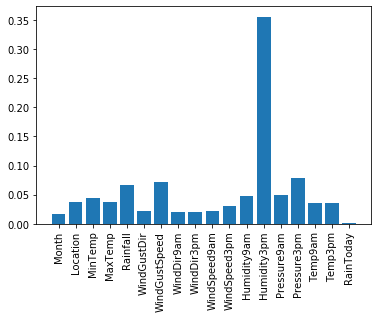

In [23]:
model = GradientBoostingClassifier(n_estimators=1000, random_state=1,learning_rate = 0.1, max_depth = 5)
# fit the model
model.fit(x1_train, y1_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in list(x1_train.columns)], importance)
pyplot.xticks(rotation=90)
pyplot.show()

# Section D

### ROC for SVM model

In [52]:
y_train_pred = svm_train.decision_function(x_train_norm)
y_test_pred = svm_train.decision_function(x_test_norm)

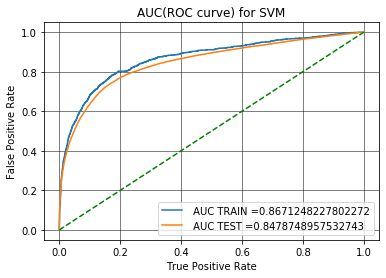

In [53]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.grid()
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve) for SVM")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### ROC for boosted decision tree model

In [54]:
y_train_pred = grad_boost.decision_function(x1_train)
y_test_pred = grad_boost.decision_function(x1_test)

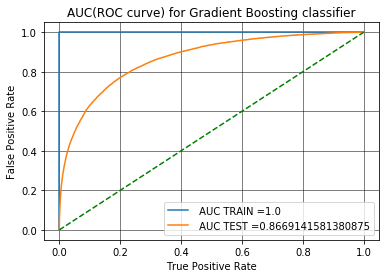

In [55]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y1_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y1_test, y_test_pred)
plt.grid()
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve) for Gradient Boosting classifier")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

##### The ROC curve of SVM model shows that the trained model performance on validation set is equivalent to the performance on training set. While, boosting classifier shows 100% accuracy on training set and 86.7% accuracy on validation set with smooth ROC curve. From ROC, it is observed that boosting classifier has less loss on model compared to SVM.